# Proyecto Final

## Model Testing

Las pruebas del modelo se realizaron en PC y en una Jetson Nano de 4 GB de RAM.

### Guía de inicio rápido para la Jetson Nano 4 GB

**Nota:** Consultar en la página [Getting Started with Jetson Nano Developer Kit](https://developer.nvidia.com/embedded/learn/get-started-jetson-nano-devkit) para obtener los pasos actualizados para iniciar con la Jetson Nano.

1. Descargar la imagen del jetpack desde https://developer.nvidia.com/jetson-nano-sd-card-image

2. Flashear la imagen descargada en una tarjeta SD. Se recomienda emplear una de al menos 32 GiB. Este paso se puede completar empleando [Balena Etcher](https://www.balena.io/etcher).

3. Colocar la tarjeta SD en la jetson Nano, conectar un monitor por HDMI, un mouse y un teclado por USB y una fuente de poder micro USB que provea 10W o una fuente de poder con un conector de barril.

4. Seguir las instrucciones en pantalla para configurar el sistema. Se recomienda configurar la partición de datos en el límite máximo.

**Nota:** Consultar la página [NVIDIA Deep Learning Frameworks Documentation](https://docs.nvidia.com/deeplearning/frameworks/install-tf-jetson-platform/index.html) para verificar si los pasos requeridos han cambiado.

### Comandos de instalación

Actualizar los repositorios

In [ ]:
sudo apt-get update

Instalar paquetes requeridos

In [ ]:
sudo apt-get install libhdf5-serial-dev hdf5-tools libhdf5-dev zlib1g-dev zip libjpeg8-dev liblapack-dev libblas-dev gfortran

Instalar y actualizar pip

In [ ]:
sudo apt-get install python3-pip
sudo pip3 install -U pip testresources setuptools==49.6.0

**Nota:** Consultar [NVIDIA Deep Learning Frameworks Documentation](https://docs.nvidia.com/deeplearning/frameworks/install-tf-jetson-platform-release-notes/tf-jetson-rel.html#tf-jetson-rel) para verificar si una nueva versión de las dependencias para tensorflow ha sido actualizada.

Instalar todas las dependencias

In [ ]:
sudo pip3 install -U numpy==1.19.4 future==0.18.2 mock==3.0.5 h5py==2.10.0 keras_preprocessing==1.1.2 keras_applications==1.0.8 gast==0.2.2 scipy==1.4.1 futures protobuf pybind11

Instalar tensorflow

In [ ]:
sudo pip3 install --pre --extra-index-url https://developer.download.nvidia.com/compute/redist/jp/v45 tensorflow

Instalar paquetes varios requeridos

In [ ]:
pip3 install jupyter matplotlib keras

Aumentar la RAM por medio de un archivo de intercambio (swap file)

In [ ]:
sudo fallocate -l 4G /var/swapfile
sudo chmod 600 /var/swapfile
sudo mkswap /var/swapfile
sudo swapon /var/swapfile

## Testing

Importar librerías

In [1]:
import cv2
import keras
import numpy as np
import matplotlib.pyplot as plt

Importar modelo de clasificador de alimentos 

In [2]:
model = keras.models.load_model("food_classifier_model.h5")

Función de predicción de alimento entre **bebida** o **snack**

In [3]:
def prediction(photo):
    samples,rows,columns,channels = 1,100,100,3
    images = np.zeros((samples,rows,columns,channels))
    image_array = keras.preprocessing.image.img_to_array(photo)
    image_array = keras.preprocessing.image.smart_resize(image_array,(rows,columns),interpolation='bilinear')
    image_array = image_array.astype('float32')
    images[0,:,:,:] = image_array/255
    pred = model.predict(images)
    pred = np.argmax(pred, axis = 1)
    if pred == 0:
        return "Bebida"
    else:
        return "Snack"

### Leer cámara
* Apretar **p**: Tomar foto.
* Apretar **q**: Salir.

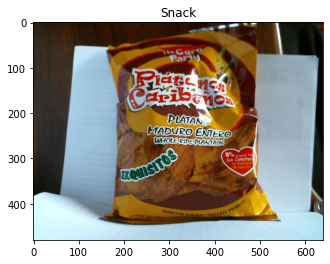

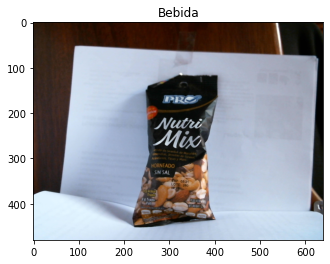

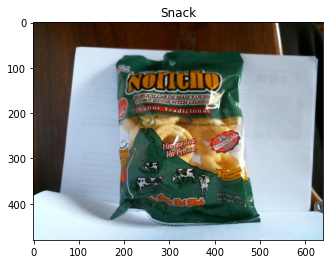

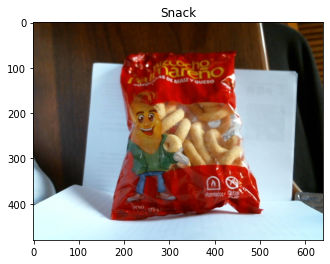

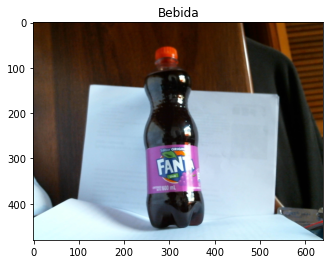

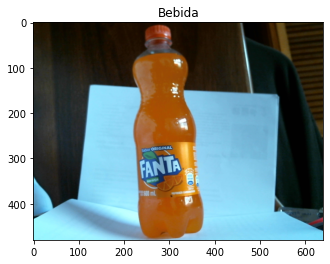

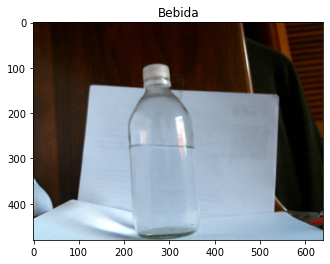

In [5]:
vid = cv2.VideoCapture(2)
height = round(vid.get(3))
width  = round(vid.get(4))
photo = np.zeros((width,height,3))
while(True):
    ret, frame = vid.read()
    cv2.imshow('frame', frame)
    c = cv2.waitKey(1)
    if c & 0xFF == ord('q'):
        break
    elif c & 0xFF == ord('p'):
        frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        photo = np.asarray(frame)
        plt.imshow(photo)
        pred_str = prediction(photo)
        plt.title(pred_str)
        plt.show()
vid.release()
cv2.destroyAllWindows()